## Tugas Praktikum

### Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

### Import Dataset

In [2]:
data = pd.read_csv('../data/insurance.csv')

Dari dataset yang telah diimport, terlihat bahwa terdapat beberapa variabel kategorik, yang mana hal tersebut menyebabkan data tidak bisa dilakukan operasi, sehingga harus dilakukan konversi dari data kategorik menjadi data numerik terlebih dahulu.

In [3]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


### Melakukan Encoding pada Variabel Kategorik

Proses encode variabel kategoris dilakukan mengubah nilai dari variabel kategoris ke nilai numerik

In [4]:
le = LabelEncoder() # membuat objek dari LabelEncoder
data['sex'] = le.fit_transform(data['sex']) # proses encoding
data['smoker'] = le.fit_transform(data['smoker']) # proses encoding
data['region'] = le.fit_transform(data['region']) # proses encoding

### Verifikasi Hasil Encode

Setelah dilakukan encode atau konversi dari data kategoris menjadi data numerik, maka terlihat bahwa data sudah berbentuk numerik, yang mana sudah dapat digunakan untuk melakukan operasi atau perhitungan.

In [5]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
5,31,0,25.740,0,0,2,3756.62160
6,46,0,33.440,1,0,2,8240.58960
7,37,0,27.740,3,0,1,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,1,28923.13692


Sebelum melakukan identifikasi terhadap variabel independen ataupun  dependen, maka perlu melakukan pengecekan nama kolom apa saja yang terdapat dalam dataset, hal ini dilakukan untuk menghindari kesalahan penulisan kolom ketika dilakukan identifikasi. Karena proses identifikasi bersifat key sensitive, yang mana variabel harus dituliskan dengan benar dan akurat, contohnya pada penulisan variabel 'charges', terdapat spasi didepan huruf c, maka hal ini juga akan mempengaruhi proses identifikasi.

In [6]:
print(data.columns)


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


Untuk itu, hilangkan terlebih dahulu tanda spasi dari nama kolom

In [7]:
data.columns = data.columns.str.strip()


### Identifikasi Variabel Independen dan Dependen

Identifikasi variabel diperlukan untuk menentukan variabel mana yang termasuk variabel bebas (fitur), dan variabel mana yang merupakan variabel target. Hal ini berguna untuk memberikan korelasi antar variabel untuk melakukan analisis sesuai dengan tujuan atau kebutuhan.


Kemudian dilakukan pembagian dataset menjadi data latih(train) dan data uji(test) dengan proporsi yang sesuai. Di sini saya membagi data latih dan data uji dengan proporsi 8:2. 

In [8]:
# Pembagian data latih dan data uji dengan proporsi 8:2
from sklearn.model_selection import train_test_split

# variabel independen
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# varibel dependen
y = data['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Melatih Model Data Latih

Untuk melatih model pada data latih, tentunya diawali dengan membuat objek model regresi linear dengan menginisialisasinya menggunakan 'LinearRegression()'. Selanjutnya melatih model menggunakan data latih, yang mana model menggambarkan hubungan antara variabel independen (X_train) dan variabel dependen (y_train) dari data latih untuk menghasilkan model regresi linear yang sesuai.

In [9]:
# Membuat objek model regresi linear
model = LinearRegression()

# Melatih model menggunakan data latih
model.fit(X_train, y_train)


LinearRegression()

### Visualisasi Prediksi pada Data Uji

Setelah melatih model, maka model telah dapat digunakan untuk melakukan prediksi pada data uji untuk memperoleh nilai prediksi berdasarkan hubungan yang telah dipelajari selama pelatihan.

Oleh karena itu dibuat visualisasi prediksi pada data uji, untuk dilakukan pengamatan terhadap bagaimana hasil prediksi model berbanding dengan nilai sebenarnya pada data yang tidak digunakan selama pelatihan (data uji).

Adapun tujuan dari visualisasi ini adalah untuk melihat sejauh mana model regresi berhasil dalam memprediksi nilai-nilai pada data uji. Jika titik-titik pada scatter plot cenderung berdekatan dengan garis referensi, maka model memiliki kinerja yang baik. Sebaliknya, jika titik-titik tersebar acak atau jauh dari garis referensi, maka menunjukkan bahwa model mungkin memiliki kesalahan dalam memprediksi data uji.

In [10]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)


a. Scatter Plot


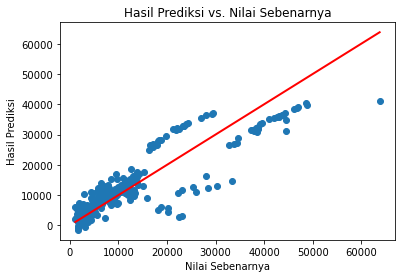

In [11]:
import matplotlib.pyplot as plt

print("a. Scatter Plot")
plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Hasil Prediksi")
plt.title("Hasil Prediksi vs. Nilai Sebenarnya")

# Menambahkan garis regresi (garis dengan kemiringan 45 derajat)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', lw=2)

plt.show()


b. Plot Linier


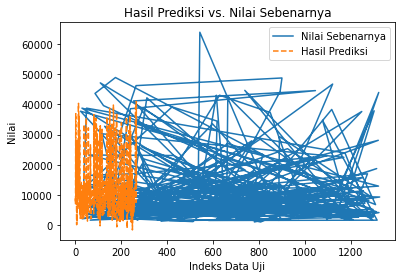

In [12]:
import matplotlib.pyplot as plt

print("b. Plot Linier")
plt.plot(y_test, label="Nilai Sebenarnya")
plt.plot(y_pred, label="Hasil Prediksi", linestyle="--")
plt.xlabel("Indeks Data Uji")
plt.ylabel("Nilai")
plt.legend()
plt.title("Hasil Prediksi vs. Nilai Sebenarnya")
plt.show()


c. Histogram Residual


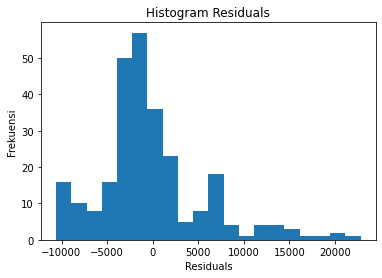

In [13]:
import matplotlib.pyplot as plt
import numpy as np

print("c. Histogram Residual")
residuals = y_test - y_pred
plt.hist(residuals, bins=20)
plt.xlabel("Residuals")
plt.ylabel("Frekuensi")
plt.title("Histogram Residuals")
plt.show()


### Mencetak Hasil Prediksi pada Data Uji

In [14]:
# Mencetak beberapa hasil prediksi
for i in range(10):  # Cetak 10 hasil prediksi pertama
    print(f"Prediksi ke-{i+1}: {y_pred[i]}")


Prediksi ke-1: 8924.407244424505
Prediksi ke-2: 7116.295017576371
Prediksi ke-3: 36909.01352143726
Prediksi ke-4: 9507.874691179602
Prediksi ke-5: 27013.350007896246
Prediksi ke-6: 10790.779561528614
Prediksi ke-7: 226.2984457086568
Prediksi ke-8: 16942.71599941161
Prediksi ke-9: 1056.6307940730276
Prediksi ke-10: 11267.919973091228


### Analisis Prediksi Berdasarkan Data Latih

Dimulai dengan melakukan regresi linear menggunakan pustaka stasmodels di Python, dengan melakukan impor beberapa library. Kemudian dilakukan memasukkan kosnstanta (bias) ke dalam model, yang akan menambahkan konstanta ke dataset pelatihan (X_train). Ini diperlukan agar model dapat memprediksi nilai yang benar ketika variabel independen adalah nol.

Selanjutnya dilakukan Ordinary Least Squares (OLS) linear regression, dengan parameter pertama merupakan variabel dependen dan parameter kedua merupakan variabel independen yang sudah termasuk kosntanta, dan hasilnya adalah objek model lr yang telah dilatih (fit) ke data latih.

In [15]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()


### Visualisasi Grafis Regresi

Memberikan gambaran secara grafis terkait hubungan antara masing-masing variabel independen dengan variabel 'charges (biaya medis)' dalam data latih.

a. Variabel 'age'


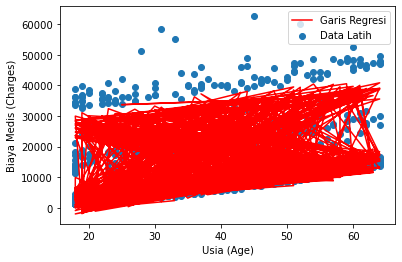

In [16]:
# Visualisasi grafis regresi

print("a. Variabel 'age'")
plt.scatter(X_train['age'], y_train, label='Data Latih')
plt.plot(X_train['age'], lr.predict(X_train_sm), 'r', label='Garis Regresi')
plt.xlabel('Usia (Age)')
plt.ylabel('Biaya Medis (Charges)')
plt.legend()
plt.show()


b. Variabel 'sex'


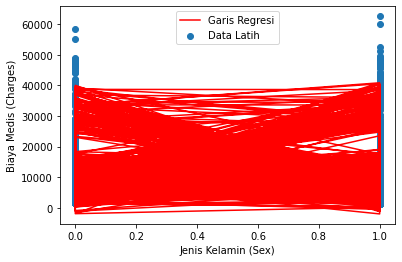

In [17]:
# Visualisasi grafis regresi

print("b. Variabel 'sex'")
plt.scatter(X_train['sex'], y_train, label='Data Latih')
plt.plot(X_train['sex'], lr.predict(X_train_sm), 'r', label='Garis Regresi')
plt.xlabel('Jenis Kelamin (Sex)')
plt.ylabel('Biaya Medis (Charges)')
plt.legend()
plt.show()


c. Variabel 'bmi'


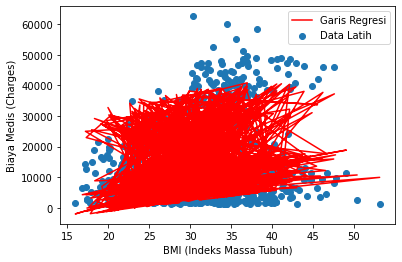

In [18]:
# Visualisasi grafis regresi

print("c. Variabel 'bmi'")
plt.scatter(X_train['bmi'], y_train, label='Data Latih')
plt.plot(X_train['bmi'], lr.predict(X_train_sm), 'r', label='Garis Regresi')
plt.xlabel('BMI (Indeks Massa Tubuh)')
plt.ylabel('Biaya Medis (Charges)')
plt.legend()
plt.show()


d. Variabel 'children'


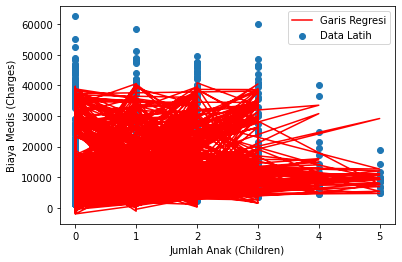

In [19]:
# Visualisasi grafis regresi

print("d. Variabel 'children'")
plt.scatter(X_train['children'], y_train, label='Data Latih')
plt.plot(X_train['children'], lr.predict(X_train_sm), 'r', label='Garis Regresi')
plt.xlabel('Jumlah Anak (Children)')
plt.ylabel('Biaya Medis (Charges)')
plt.legend()
plt.show()


e. Variabel 'region'


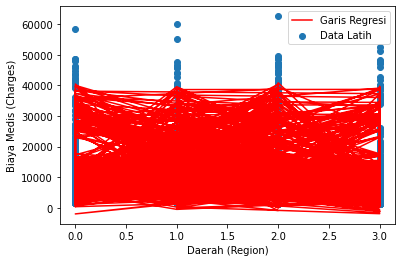

In [20]:
# Visualisasi grafis regresi

print("e. Variabel 'region'")
plt.scatter(X_train['region'], y_train, label='Data Latih')
plt.plot(X_train['region'], lr.predict(X_train_sm), 'r', label='Garis Regresi')
plt.xlabel('Daerah (Region)')
plt.ylabel('Biaya Medis (Charges)')
plt.legend()
plt.show()


f. Variabel 'smoker'


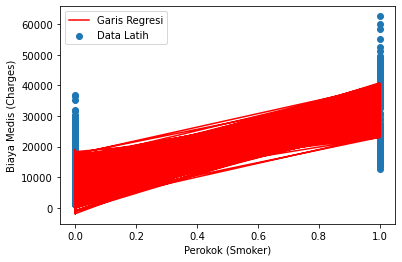

In [21]:
# Visualisasi grafis regresi

print("f. Variabel 'smoker'")
plt.scatter(X_train['smoker'], y_train, label='Data Latih')
plt.plot(X_train['smoker'], lr.predict(X_train_sm), 'r', label='Garis Regresi')
plt.xlabel('Perokok (Smoker)')
plt.ylabel('Biaya Medis (Charges)')
plt.legend()
plt.show()


Konversi objek series 'y' menjadi array numpy dan mengubah dimensi array tersebut. Hal ini dilakukan karena beberapa model regresi pada library Scikit-Learn memerlukan input dalam bentuk array 2D, bukan objek series 1D. 

In [22]:
# Mengonversi objek Series 'y' menjadi array numpy
y = y.values.reshape(-1, 1) #mengubah data dari 1D menjadi 2D dengan 1 kolom


### Feature Scaling

Dilakukan ketika variabel-variabel fitur memiliki skala yang berbeda-beda. Dalam hal ini StandarScaler() berperan untuk mengubah skala fitur-fitur pada data sehingga memiliki rata-rata o dan STD 1.

In [23]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

### Melatih Model Support Vector Regression (SVR)

In [24]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [25]:
from sklearn.svm import SVR

# Inisialisasi model SVR
svr_model = SVR(kernel='rbf')  # Anda dapat memilih kernel yang sesuai dengan data Anda

# Melatih model SVR menggunakan data latih yang telah di-scale
svr_model.fit(X, y)

# Membuat prediksi dengan model SVR
y_pred_svr = svr_model.predict(X)


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Visualisasi Hasil SVR

Memberikan gambaran tentang sejauh mana model SVR cocok dengan data sebenarnya. Semakin dekat titik merah dengan titik biru, semakin baik performa model SVR.

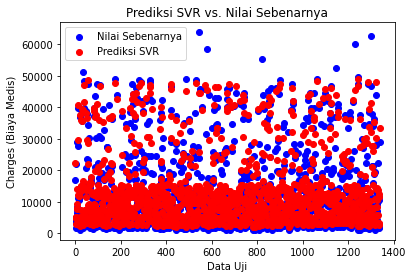

In [26]:
# Invers scaling untuk hasil prediksi dan nilai sebenarnya
y_pred_original = sc_y.inverse_transform(y_pred_svr)
y_test_original = sc_y.inverse_transform(y)

# Plot hasil prediksi vs. nilai sebenarnya
plt.scatter(range(len(y_test_original)), y_test_original, color='blue', label='Nilai Sebenarnya')
plt.scatter(range(len(y_pred_original)), y_pred_original, color='red', label='Prediksi SVR')
plt.xlabel('Data Uji')
plt.ylabel('Charges (Biaya Medis)')
plt.legend()
plt.title('Prediksi SVR vs. Nilai Sebenarnya')
plt.show()


### Evaluasi Model SVR

• R-squared (Coefficient od Determination): mengukur sejauh mana variasi dalam data target dapat dijelaskan oleh model. Nilai R-squared berkisar dari 0 hingga 1, dan semakin mendekati 1, semakin baik model dalam menjelaskan variasi dalam data target.

• MSE: mengukur rata-rata dari kuadrat selisih antara prediksi model dan nilai sebenarnya pada data uji. Semakin kecil nilai MSE, semakin baik model bekerja

• MAE: mengukur rata-rata dari nilai absolut selisih antara prediksi model dan nilai sebenarnya pada data uji;

In [27]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Prediksi menggunakan model
y_pred = model.predict(X_test)

# Menghitung R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Menghitung MSE
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Menghitung MAE
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)


R-squared: 0.7833463107364539
Mean Squared Error (MSE): 33635210.431178406
Mean Absolute Error (MAE): 4186.5088983664355
